## Lots of codes are commented out to avoid running them repeatedly unnecessarily. This work lasted for several days and some codes did not need to run every time I worked on it.  

## Getting data from web pages. Saving and dowloading files localy to save repeated calls

In [1]:
import pandas as pd
import numpy as np

In [2]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [6]:
#%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [ ]:
!conda install -c conda-forge beautifulsoup4 --yes         #install beautifulsoup
from bs4 import BeautifulSoup              #for sacraping a webpage
from pandas import DataFrame       #for convering a list to dataframe
import requests        #make a request to get the webpage/url               
print('import and install finished')

In [ ]:
page = requests.get("https://en.wikipedia.org/wiki/Community_areas_in_Chicago")
soup = BeautifulSoup(page.content,'html.parser')    #scrape & parse 
table = soup.find_all('table')    
df = pd.read_html(str(table))[0] 

## cleaning data 

In [3]:
df = pd.read_csv("final.csv")
print('data read')
df.head()

data read


Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1 case_number  \
0           0        120172          187637            187637    JD109980   
1           1        120336          187805            187805    JD110189   
2           2        120688          188163            188163    JD109951   
3           3        121998          189516            189516    JD110194   
4           4        121999          189517            189517    JD110266   

          primary_type         location_description  community_area  \
0  MOTOR VEHICLE THEFT  AUTO / BOAT / RV DEALERSHIP              67   
1             BURGLARY                    APARTMENT              69   
2              BATTERY                       STREET              25   
3    WEAPONS VIOLATION                       STREET              38   
4    CRIMINAL TRESPASS        MEDICAL/DENTAL OFFICE              73   

   x_coordinate  y_coordinate  year   latitude  longitude  \
0     1166690.0     1865304.0  2020  41.785960 -87.664375   
1     1174949.0     1854311.0  2020  41.755613 -87.634421   
2     1144164.0     1903225.0  2020  41.890471 -87.746016   
3     1179582.0     1876300.0  2020  41.815849 -87.616771   
4     1172697.0     1840207.0  2020  41.716960 -87.643088   

                        location            Neighborhood  
0     (41.78595959, -87.6643748)          West Englewood  
1  (41.755613227, -87.634420924)  Greater Grand Crossing  
2  (41.890471431, -87.746016415)                  Austin  
3  (41.815848621, -87.616770643)         Grand Boulevard  
4  (41.716959853, -87.643088472)      Washington Heights

In [4]:
df.shape

(98069, 15)

## reading data on neiborhoods   

In [5]:
df1 = pd.read_csv("neighborhood.csv")
print('data read')
df1.head()

data read


Neighborhood  count
0           Austin   6021
1      South Shore   3743
2  Near North Side   3444
3   North Lawndale   3334
4    Humboldt Park   3133

## summary stats for neighborhood data

In [220]:
df1['count'].describe()

count      77.000000
mean     1273.623377
std      1089.754681
min        95.000000
25%       495.000000
50%       876.000000
75%      1789.000000
max      6021.000000
Name: count, dtype: float64

## Box plot for neighborhood

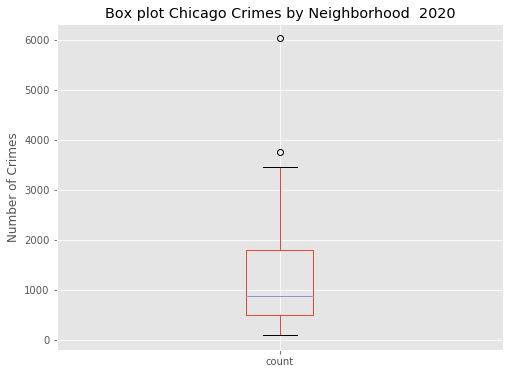

In [7]:
df1.plot(kind='box', figsize=(8, 6))

plt.title('Box plot Chicago Crimes by Neighborhood  2020')
plt.ylabel('Number of Crimes')

plt.show()

In [45]:
#df1.index.name = 'Neighborhood'

## importing chisquare from scipy. stats and performing the test

In [8]:
from scipy.stats import chisquare

In [9]:
chisquare(df1['count'])

Power_divergenceResult(statistic=70864.71694419236, pvalue=0.0)

## dataframe for types of crimes

In [24]:
df_2 = pd.DataFrame(df['primary_type'].value_counts())
df_2.columns = ['count']
df_2

count
BATTERY                            20356
THEFT                              19869
CRIMINAL DAMAGE                    11816
ASSAULT                             8515
OTHER OFFENSE                       6072
DECEPTIVE PRACTICE                  5727
BURGLARY                            4395
MOTOR VEHICLE THEFT                 4123
NARCOTICS                           3817
ROBBERY                             3432
WEAPONS VIOLATION                   3426
CRIMINAL TRESPASS                   2267
OFFENSE INVOLVING CHILDREN           955
PUBLIC PEACE VIOLATION               787
CRIMINAL SEXUAL ASSAULT              463
SEX OFFENSE                          439
INTERFERENCE WITH PUBLIC OFFICER     396
HOMICIDE                             331
ARSON                                260
PROSTITUTION                         127
CRIM SEXUAL ASSAULT                  119
STALKING                              79
CONCEALED CARRY LICENSE VIOLATION     71
INTIMIDATION                          63
KIDNAPPING                            61
LIQUOR LAW VIOLATION                  53
OBSCENITY                             25
GAMBLING                              13
OTHER NARCOTIC VIOLATION               5
PUBLIC INDECENCY                       4
HUMAN TRAFFICKING                      3

## summary stats and plots for types of crimes

In [18]:
df_2['count'].describe()

count       31.000000
mean      3163.516129
std       5362.080553
min          3.000000
25%         67.000000
50%        439.000000
75%       3970.000000
max      20356.000000
Name: count, dtype: float64

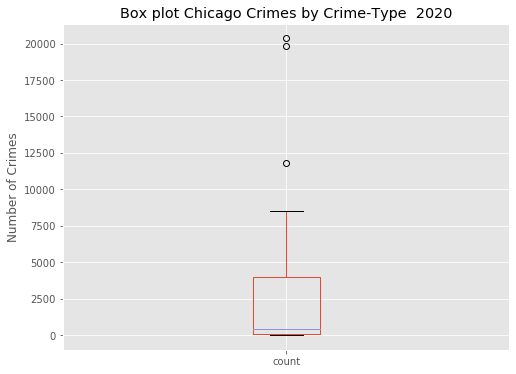

In [19]:
df_2.plot(kind='box', figsize=(8, 6))

plt.title('Box plot Chicago Crimes by Crime-Type  2020')
plt.ylabel('Number of Crimes')

plt.show()

## Chi-Square test for types of crimes

In [20]:
chisquare(df1['count'])

Power_divergenceResult(statistic=70864.71694419236, pvalue=0.0)

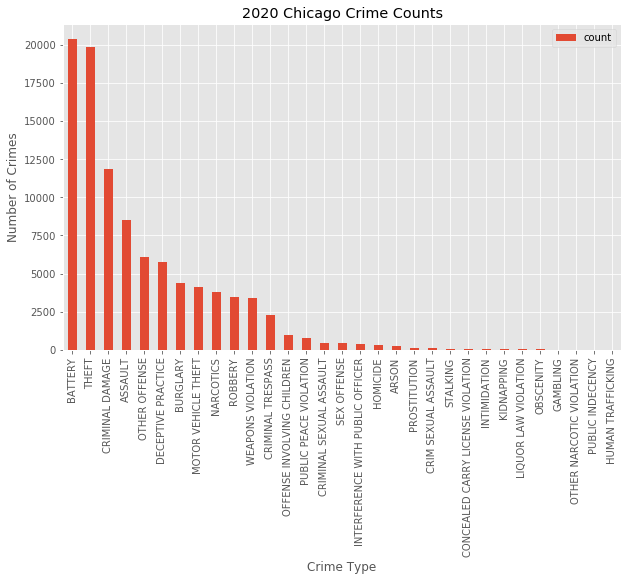

In [25]:
# plot data
df_2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Crime Type') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('2020 Chicago Crime Counts') # add title to the plot

plt.show()

In [26]:
df_2['percentage'] = 100*df_2['count']/df_2['count'].sum()
df_2

count  percentage
BATTERY                            20356   20.756814
THEFT                              19869   20.260225
CRIMINAL DAMAGE                    11816   12.048660
ASSAULT                             8515    8.682662
OTHER OFFENSE                       6072    6.191559
DECEPTIVE PRACTICE                  5727    5.839766
BURGLARY                            4395    4.481539
MOTOR VEHICLE THEFT                 4123    4.204183
NARCOTICS                           3817    3.892158
ROBBERY                             3432    3.499577
WEAPONS VIOLATION                   3426    3.493459
CRIMINAL TRESPASS                   2267    2.311638
OFFENSE INVOLVING CHILDREN           955    0.973804
PUBLIC PEACE VIOLATION               787    0.802496
CRIMINAL SEXUAL ASSAULT              463    0.472117
SEX OFFENSE                          439    0.447644
INTERFERENCE WITH PUBLIC OFFICER     396    0.403797
HOMICIDE                             331    0.337517
ARSON                                260    0.265119
PROSTITUTION                         127    0.129501
CRIM SEXUAL ASSAULT                  119    0.121343
STALKING                              79    0.080556
CONCEALED CARRY LICENSE VIOLATION     71    0.072398
INTIMIDATION                          63    0.064240
KIDNAPPING                            61    0.062201
LIQUOR LAW VIOLATION                  53    0.054044
OBSCENITY                             25    0.025492
GAMBLING                              13    0.013256
OTHER NARCOTIC VIOLATION               5    0.005098
PUBLIC INDECENCY                       4    0.004079
HUMAN TRAFFICKING                      3    0.003059

## extracting the date column from the time colums and preparing a dataframe for day-0f-week

In [40]:
#df1 = pd.read_csv("Chicao2001.csv")
#print('data read')
#df1.head()

In [41]:
#df5 = df1[df1['Year']== 2020]
#df5.shape

In [35]:
#df5['Date'] = df5['Date'].astype('datetime64[ns]')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
#df5.dropna(subset=['Date'])

In [39]:
#df5.to_csv('date.csv')

In [42]:
#df5['day'] = df5['Date'].dt.day_name()
#df5

In [49]:
df05 = pd.DataFrame(df5['day'].value_counts())
df05.columns = ['count']
df05

count
Sunday     15039
Friday     14554
Saturday   14547
Wednesday  14276
Monday     13862
Thursday   13563
Tuesday    13309

## summary stats and plots for day of the week

In [50]:
df05.describe()

count
count      7.000000
mean   14164.285714
std      613.784358
min    13309.000000
25%    13712.500000
50%    14276.000000
75%    14550.500000
max    15039.000000

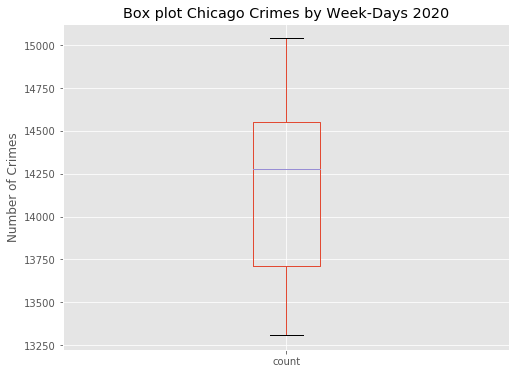

In [51]:
df05.plot(kind='box', figsize=(8, 6))

plt.title('Box plot Chicago Crimes by Week-Days 2020')
plt.ylabel('Number of Crimes')

plt.show()

## Chi-square test for day of the week

In [53]:
chisquare(df05['count'])

Power_divergenceResult(statistic=159.58358043368634, pvalue=7.25498977771133e-32)

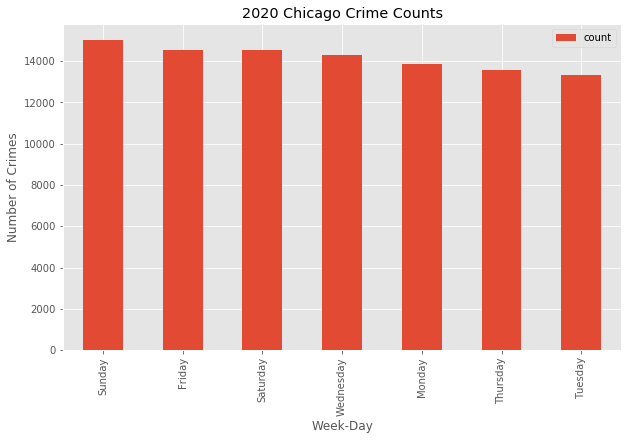

In [52]:
# plot data
df05.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Week-Day') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('2020 Chicago Crime Counts') # add title to the plot

plt.show()

## lots of codes commented out because they were only needed once

In [43]:
#df.dropna(subset=['Date'])
#df2020['Date'].dt.dayofweek
#df2020['day']=df2020['Date'].dt.dayofweek
#print(df2020.dtypes)
#df2020['Date'] = df2020['Date'].astype('datetime64[ns]')
#df2020['day'] = df2020['Date'].dt.day_name()
#df2020.shape

In [221]:
#df1.reset_index(drop=True, inplace=True)
#df1.set_index('Neighborhood', inplace=True)
#df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#df1.drop('percentage',axis=1,inplace=True)
#df1
#df1.to_csv('neighborhood.csv')
#df1

In [108]:
# df1.number1 = df1.number1.astype(str)
# new = df1['name'].values.tolist() #product = df['Product'].values.tolist()
# new1 = new[0:9]
# new1
# df['Neighborhood'] = df['Neighborhood'].replace(old1,new1)
# df.rename(columns={'community':'Neighborhood'}, inplace=True)
# print(df.columns)
# print(neighborhood['Neighborhood'].unique())
#pd.set_option("max_rows", None)
#pd.reset_option("max_rows", None)
# movies
# df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [9]:
# df2 = pd.DataFrame(df['Neighborhood'].value_counts())
# df2.columns = ['count']
# neighborhood = df2.reset_index()
# neighborhood

In [10]:
# neighborhood['percentage'] = 100*neighborhood['count']/neighborhood['count'].sum()
# neighborhood

In [59]:
topbot = df1.iloc[[0,1,2,3,4,36,37,38,39,40,72,73,74,75,76]]
topbot

count
Neighborhood          
Austin            6021
South Shore       3743
Near North Side   3444
North Lawndale    3334
Humboldt Park     3133
Washington Park    913
Albany Park        888
Ashburn            876
Brighton Park      831
Gage Park          820
Hegewisch          229
Forest Glen        217
Mount Greenwood    203
Burnside           156
Edison Park         95

In [14]:
# pd.set_option("max_rows", None)  #display all rows
# topbot                           #display all rows

# pd.reset_option(“max_columns”)
# movies.head()

In [60]:
#topbot.drop(['percentage'],axis=1,inplace=True) 

## plots and cleaning for neighborhood date (preliminary work)

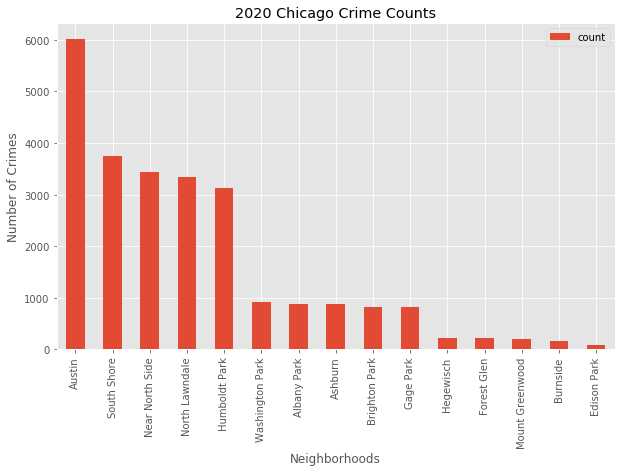

In [62]:
# step 2: plot data
topbot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('2020 Chicago Crime Counts') # add title to the plot

plt.show()

## importing folium for map of Chicago

In [69]:
# create map and display it
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

chicago_map

In [27]:
df2020 = pd.read_csv("df2020.csv")
print('data read')
df2020.head()

data read


Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 case_number         primary_type  \
0      120172        187637          187637    JD109980  MOTOR VEHICLE THEFT   
1      120336        187805          187805    JD110189             BURGLARY   
2      120688        188163          188163    JD109951              BATTERY   
3      121998        189516          189516    JD110194    WEAPONS VIOLATION   
4      121999        189517          189517    JD110266    CRIMINAL TRESPASS   

          location_description  community_area  x_coordinate  y_coordinate  \
0  AUTO / BOAT / RV DEALERSHIP            67.0     1166690.0     1865304.0   
1                    APARTMENT            69.0     1174949.0     1854311.0   
2                       STREET            25.0     1144164.0     1903225.0   
3                       STREET            38.0     1179582.0     1876300.0   
4        MEDICAL/DENTAL OFFICE            73.0     1172697.0     1840207.0   

   year   latitude  longitude                       location  
0  2020  41.785960 -87.664375     (41.78595959, -87.6643748)  
1  2020  41.755613 -87.634421  (41.755613227, -87.634420924)  
2  2020  41.890471 -87.746016  (41.890471431, -87.746016415)  
3  2020  41.815849 -87.616771  (41.815848621, -87.616770643)  
4  2020  41.716960 -87.643088  (41.716959853, -87.643088472)

## preparing data for Foursquare search

In [80]:
df20201 = df2020.sample(n=1000) # df.sample(n = 3)
df20201.head()
#df20201 = df2020.iloc[0:1000, :]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 case_number  \
36903      204838        274143          274143    JD174695   
50571      219275        289132          289132    JD196287   
81630      251358        322065          322065    JD251668   
56495      225486        295508          295508    JD207791   
55711      224660        294654          294654    JD205154   

             primary_type                   location_description  \
36903               THEFT                                 STREET   
50571  DECEPTIVE PRACTICE                              APARTMENT   
81630             BATTERY                              APARTMENT   
56495  DECEPTIVE PRACTICE                              APARTMENT   
55711       OTHER OFFENSE  POLICE FACILITY / VEHICLE PARKING LOT   

       community_area  x_coordinate  y_coordinate  year   latitude  longitude  \
36903            72.0     1162922.0     1834776.0  2020  41.702266 -87.679041   
50571            22.0     1154645.0     1915495.0  2020  41.923938 -87.707196   
81630            71.0     1170252.0     1849765.0  2020  41.743242 -87.651766   
56495            28.0     1169628.0     1899280.0  2020  41.879130 -87.652616   
55711            71.0     1172325.0     1852947.0  2020  41.751928 -87.644077   

                            location  
36903  (41.702265751, -87.679041237)  
50571    (41.92393809, -87.70719602)  
81630  (41.743241816, -87.651766224)  
56495  (41.879129725, -87.652615517)  
55711  (41.751928332, -87.644077264)

## map of crime incidents across the city

In [83]:

incidents = folium.map.FeatureGroup()

# loop through the 2020 crimes and add each to the incidents feature group
for lat, lng, in zip(df20201.latitude, df20201.longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
chicago_map.add_child(incidents)

In [82]:
from folium import plugins

# let's start again with a clean copy of the map of Chciago
chicago_map = folium.Map(location = [41.8781, -87.6298], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(chicago_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df20201.latitude, df20201.longitude, df20201.primary_type):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
chicago_map

## more prelimenay work preparing for plots and maps

In [84]:
df20201.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 case_number  \
36903      204838        274143          274143    JD174695   
50571      219275        289132          289132    JD196287   
81630      251358        322065          322065    JD251668   
56495      225486        295508          295508    JD207791   
55711      224660        294654          294654    JD205154   

             primary_type                   location_description  \
36903               THEFT                                 STREET   
50571  DECEPTIVE PRACTICE                              APARTMENT   
81630             BATTERY                              APARTMENT   
56495  DECEPTIVE PRACTICE                              APARTMENT   
55711       OTHER OFFENSE  POLICE FACILITY / VEHICLE PARKING LOT   

       community_area  x_coordinate  y_coordinate  year   latitude  longitude  \
36903            72.0     1162922.0     1834776.0  2020  41.702266 -87.679041   
50571            22.0     1154645.0     1915495.0  2020  41.923938 -87.707196   
81630            71.0     1170252.0     1849765.0  2020  41.743242 -87.651766   
56495            28.0     1169628.0     1899280.0  2020  41.879130 -87.652616   
55711            71.0     1172325.0     1852947.0  2020  41.751928 -87.644077   

                            location  
36903  (41.702265751, -87.679041237)  
50571    (41.92393809, -87.70719602)  
81630  (41.743241816, -87.651766224)  
56495  (41.879129725, -87.652615517)  
55711  (41.751928332, -87.644077264)

In [224]:
df1.head()

Neighborhood  count
0           Austin   6021
1      South Shore   3743
2  Near North Side   3444
3   North Lawndale   3334
4    Humboldt Park   3133

In [86]:
df01 = pd.read_csv("final.csv")
print('data read')
df01.head()

data read


Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1 case_number  \
0           0        120172          187637            187637    JD109980   
1           1        120336          187805            187805    JD110189   
2           2        120688          188163            188163    JD109951   
3           3        121998          189516            189516    JD110194   
4           4        121999          189517            189517    JD110266   

          primary_type         location_description  community_area  \
0  MOTOR VEHICLE THEFT  AUTO / BOAT / RV DEALERSHIP              67   
1             BURGLARY                    APARTMENT              69   
2              BATTERY                       STREET              25   
3    WEAPONS VIOLATION                       STREET              38   
4    CRIMINAL TRESPASS        MEDICAL/DENTAL OFFICE              73   

   x_coordinate  y_coordinate  year   latitude  longitude  \
0     1166690.0     1865304.0  2020  41.785960 -87.664375   
1     1174949.0     1854311.0  2020  41.755613 -87.634421   
2     1144164.0     1903225.0  2020  41.890471 -87.746016   
3     1179582.0     1876300.0  2020  41.815849 -87.616771   
4     1172697.0     1840207.0  2020  41.716960 -87.643088   

                        location            Neighborhood  
0     (41.78595959, -87.6643748)          West Englewood  
1  (41.755613227, -87.634420924)  Greater Grand Crossing  
2  (41.890471431, -87.746016415)                  Austin  
3  (41.815848621, -87.616770643)         Grand Boulevard  
4  (41.716959853, -87.643088472)      Washington Heights

In [88]:
print(df01.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'case_number', 'primary_type', 'location_description', 'community_area',
       'x_coordinate', 'y_coordinate', 'year', 'latitude', 'longitude',
       'location', 'Neighborhood'],
      dtype='object')


In [90]:
#df02 = pd.DataFrame(df01['primary_type'].value_counts())
df02.columns = ['count']
#df02 = df02.reset_index()
#df02 = df02.set_index('primary_type')
df02

count
BATTERY                            20356
THEFT                              19869
CRIMINAL DAMAGE                    11816
ASSAULT                             8515
OTHER OFFENSE                       6072
DECEPTIVE PRACTICE                  5727
BURGLARY                            4395
MOTOR VEHICLE THEFT                 4123
NARCOTICS                           3817
ROBBERY                             3432
WEAPONS VIOLATION                   3426
CRIMINAL TRESPASS                   2267
OFFENSE INVOLVING CHILDREN           955
PUBLIC PEACE VIOLATION               787
CRIMINAL SEXUAL ASSAULT              463
SEX OFFENSE                          439
INTERFERENCE WITH PUBLIC OFFICER     396
HOMICIDE                             331
ARSON                                260
PROSTITUTION                         127
CRIM SEXUAL ASSAULT                  119
STALKING                              79
CONCEALED CARRY LICENSE VIOLATION     71
INTIMIDATION                          63
KIDNAPPING                            61
LIQUOR LAW VIOLATION                  53
OBSCENITY                             25
GAMBLING                              13
OTHER NARCOTIC VIOLATION               5
PUBLIC INDECENCY                       4
HUMAN TRAFFICKING                      3

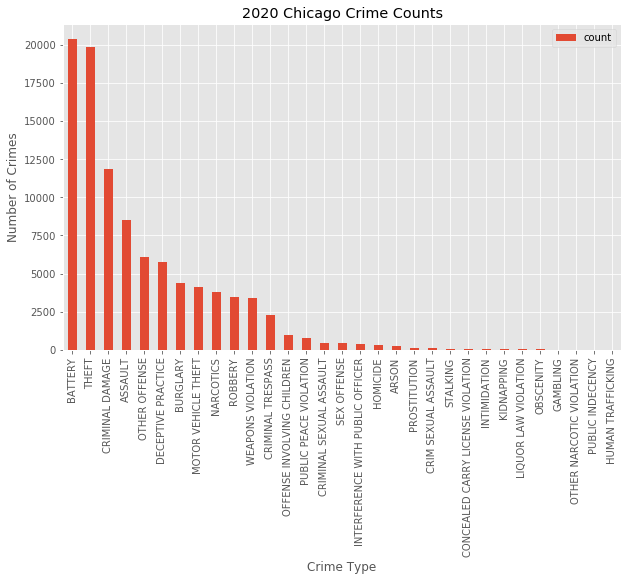

In [91]:
# plot data
df02.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Crime Type') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('2020 Chicago Crime Counts') # add title to the plot

plt.show()

In [ ]:
df_3 = pd.read_csv("final.csv")
print('data read')
df01.head()

In [92]:
df02['percentage'] = 100*df02['count']/df02['count'].sum()
df02

count  percentage
BATTERY                            20356   20.756814
THEFT                              19869   20.260225
CRIMINAL DAMAGE                    11816   12.048660
ASSAULT                             8515    8.682662
OTHER OFFENSE                       6072    6.191559
DECEPTIVE PRACTICE                  5727    5.839766
BURGLARY                            4395    4.481539
MOTOR VEHICLE THEFT                 4123    4.204183
NARCOTICS                           3817    3.892158
ROBBERY                             3432    3.499577
WEAPONS VIOLATION                   3426    3.493459
CRIMINAL TRESPASS                   2267    2.311638
OFFENSE INVOLVING CHILDREN           955    0.973804
PUBLIC PEACE VIOLATION               787    0.802496
CRIMINAL SEXUAL ASSAULT              463    0.472117
SEX OFFENSE                          439    0.447644
INTERFERENCE WITH PUBLIC OFFICER     396    0.403797
HOMICIDE                             331    0.337517
ARSON                                260    0.265119
PROSTITUTION                         127    0.129501
CRIM SEXUAL ASSAULT                  119    0.121343
STALKING                              79    0.080556
CONCEALED CARRY LICENSE VIOLATION     71    0.072398
INTIMIDATION                          63    0.064240
KIDNAPPING                            61    0.062201
LIQUOR LAW VIOLATION                  53    0.054044
OBSCENITY                             25    0.025492
GAMBLING                              13    0.013256
OTHER NARCOTIC VIOLATION               5    0.005098
PUBLIC INDECENCY                       4    0.004079
HUMAN TRAFFICKING                      3    0.003059

In [93]:
df01.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1 case_number  \
0           0        120172          187637            187637    JD109980   
1           1        120336          187805            187805    JD110189   
2           2        120688          188163            188163    JD109951   
3           3        121998          189516            189516    JD110194   
4           4        121999          189517            189517    JD110266   

          primary_type         location_description  community_area  \
0  MOTOR VEHICLE THEFT  AUTO / BOAT / RV DEALERSHIP              67   
1             BURGLARY                    APARTMENT              69   
2              BATTERY                       STREET              25   
3    WEAPONS VIOLATION                       STREET              38   
4    CRIMINAL TRESPASS        MEDICAL/DENTAL OFFICE              73   

   x_coordinate  y_coordinate  year   latitude  longitude  \
0     1166690.0     1865304.0  2020  41.785960 -87.664375   
1     1174949.0     1854311.0  2020  41.755613 -87.634421   
2     1144164.0     1903225.0  2020  41.890471 -87.746016   
3     1179582.0     1876300.0  2020  41.815849 -87.616771   
4     1172697.0     1840207.0  2020  41.716960 -87.643088   

                        location            Neighborhood  
0     (41.78595959, -87.6643748)          West Englewood  
1  (41.755613227, -87.634420924)  Greater Grand Crossing  
2  (41.890471431, -87.746016415)                  Austin  
3  (41.815848621, -87.616770643)         Grand Boulevard  
4  (41.716959853, -87.643088472)      Washington Heights

In [98]:
df2020 = df03[df03['Year']== 2020]
df2020.shape

(99150, 22)

In [120]:
#df2020.dropna(subset=['Date'])
#df2020['Date'].dt.dayofweek
#df2020['day']=df2020['Date'].dt.dayofweek
#print(df2020.dtypes)
#df2020['Date'] = df2020['Date'].astype('datetime64[ns]')
#df2020['day'] = df2020['Date'].dt.day_name()
#df2020.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
df2020.head()

ID Case Number                Date  \
187637  11946909    JD109980 2020-01-09 14:25:00   
187805  11946915    JD110189 2020-01-09 16:58:00   
188162  11946931    JD110284 2020-01-09 20:25:00   
188163  11946971    JD109951 2020-01-09 15:53:00   
189516  11947070    JD110194 2020-01-09 18:46:00   

                                      Block  IUCR         Primary Type  \
187637                  059XX S ASHLAND AVE  0910  MOTOR VEHICLE THEFT   
187805                  076XX S STEWART AVE  0610             BURGLARY   
188162                 012XX S MICHIGAN AVE  1154   DECEPTIVE PRACTICE   
188163                     048XX W RACE AVE  0486              BATTERY   
189516  043XX S DR MARTIN LUTHER KING JR DR  143A    WEAPONS VIOLATION   

                                    Description         Location Description  \
187637                               AUTOMOBILE  AUTO / BOAT / RV DEALERSHIP   
187805                           FORCIBLE ENTRY                    APARTMENT   
188162  FINANCIAL IDENTITY THEFT $300 AND UNDER                          NaN   
188163                  DOMESTIC BATTERY SIMPLE                       STREET   
189516                 UNLAWFUL POSS OF HANDGUN                       STREET   

        Arrest  Domestic  ...  Community Area  FBI Code  X Coordinate  \
187637   False     False  ...            67.0        07     1166690.0   
187805   False     False  ...            69.0        05     1174949.0   
188162   False     False  ...            33.0        11     1177422.0   
188163   False      True  ...            25.0       08B     1144164.0   
189516    True     False  ...            38.0        15     1179582.0   

        Y Coordinate  Year              Updated On   Latitude  Longitude  \
187637     1865304.0  2020  01/16/2020 03:49:10 PM  41.785960 -87.664375   
187805     1854311.0  2020  01/16/2020 03:49:10 PM  41.755613 -87.634421   
188162     1894769.0  2020  01/16/2020 03:49:10 PM  41.866578 -87.624134   
188163     1903225.0  2020  01/16/2020 03:49:10 PM  41.890471 -87.746016   
189516     1876300.0  2020  01/16/2020 03:49:10 PM  41.815849 -87.616771   

                             Location       day  
187637     (41.78595959, -87.6643748)  Thursday  
187805  (41.755613227, -87.634420924)  Thursday  
188162  (41.866578077, -87.624134464)  Thursday  
188163  (41.890471431, -87.746016415)  Thursday  
189516  (41.815848621, -87.616770643)  Thursday  

[5 rows x 23 columns]

In [128]:
#df04 = pd.DataFrame(df2020['day'].value_counts())
#df04.columns = ['count']
#df04 = df04.reset_index()
#df04 = df04.set_index('day')
df04

count
Sunday     15039
Friday     14554
Saturday   14547
Wednesday  14276
Monday     13862
Thursday   13563
Tuesday    13309

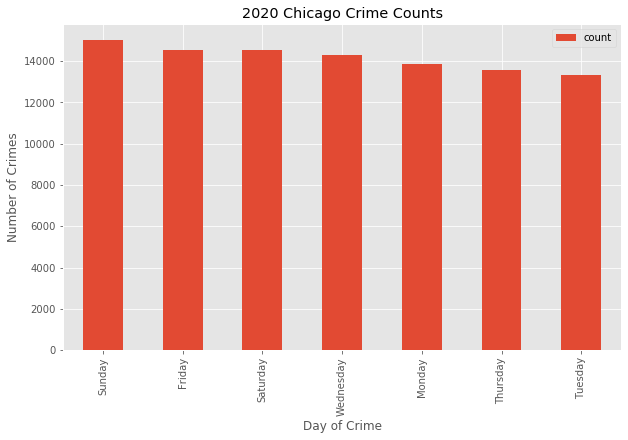

In [130]:
# plot data
df04.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Day of Crime') # add to x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('2020 Chicago Crime Counts') # add title to the plot

plt.show()

In [133]:
from scipy import stats
import numpy as np

In [134]:
df04['f_exp']=(1/7)*df04['count'].sum()
df04

count         f_exp
Sunday     15039  14164.285714
Friday     14554  14164.285714
Saturday   14547  14164.285714
Wednesday  14276  14164.285714
Monday     13862  14164.285714
Thursday   13563  14164.285714
Tuesday    13309  14164.285714

In [143]:
from scipy.stats import chisquare

In [144]:
chisquare(df04['count'])

Power_divergenceResult(statistic=159.58358043368634, pvalue=7.25498977771133e-32)

## importing and istalling libraries for map

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [146]:
df2020.columns = df2020.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [147]:
print(df2020.columns)

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'day'],
      dtype='object')


## selecting specific neigborhoods to get latitude and longitude 

In [209]:
#df2020[df2020['community_area']==44]  #44 chattam SouthSide
#df2020[df2020['community_area']==70]  #70 Ashburn
#df2020[df2020['community_area']==29]  #29 North Avondale
df2020[df2020['community_area']==29]  #29 North Avondale

id case_number                date                  block  iucr  \
197022  11947053    JD110248 2020-01-09 19:15:00        019XX S TROY ST  0496   
197557  11946497    JD109637 2020-01-09 11:30:00     013XX S KARLOV AVE  0486   
197617  11947758    JD111137 2020-01-10 15:22:00   014XX S KOMENSKY AVE  2024   
198960  11946624    JD109815 2020-01-09 13:55:00   015XX S KOMENSKY AVE  2024   
198974  11947041    JD110235 2020-01-09 19:30:00   039XX W ROOSEVELT RD  0326   
...          ...         ...                 ...                    ...   ...   
340007  12025307    JD203657 2020-04-07 00:56:00     015XX S HAMLIN AVE  1320   
340061  12025848    JD204216 2020-04-07 18:00:00  018XX S FAIRFIELD AVE  143A   
340067  12025950    JD204378 2020-04-07 22:25:00     018XX S KARLOV AVE  0454   
340073  12025882    JD204327 2020-04-07 21:00:00   018XX S ST LOUIS AVE  031A   
340076  12025574    JD203967 2020-04-07 13:20:00  016XX S FAIRFIELD AVE  2851   

                  primary_type  \
197022                 BATTERY   
197557                 BATTERY   
197617               NARCOTICS   
198960               NARCOTICS   
198974                 ROBBERY   
...                        ...   
340007         CRIMINAL DAMAGE   
340061       WEAPONS VIOLATION   
340067                 BATTERY   
340073                 ROBBERY   
340076  PUBLIC PEACE VIOLATION   

                                              description  \
197022    AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST   
197557                            DOMESTIC BATTERY SIMPLE   
197617                                POSS: HEROIN(WHITE)   
198960                                POSS: HEROIN(WHITE)   
198974                     AGGRAVATED VEHICULAR HIJACKING   
...                                                   ...   
340007                                         TO VEHICLE   
340061                      UNLAWFUL POSSESSION - HANDGUN   
340067  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
340073                                    ARMED - HANDGUN   
340076                                       ARSON THREAT   

                 location_description  arrest  domestic  ...  community_area  \
197022                      APARTMENT   False      True  ...            29.0   
197557                      APARTMENT   False      True  ...            29.0   
197617  RESIDENTIAL YARD (FRONT/BACK)    True     False  ...            29.0   
198960                          ALLEY    True     False  ...            29.0   
198974                    GAS STATION   False     False  ...            29.0   
...                               ...     ...       ...  ...             ...   
340007                         STREET   False     False  ...            29.0   
340061         VEHICLE NON-COMMERCIAL    True     False  ...            29.0   
340067                      RESIDENCE    True     False  ...            29.0   
340073                          ALLEY   False     False  ...            29.0   
340076                      RESIDENCE   False     False  ...            29.0   

        fbi_code  x_coordinate  y_coordinate  year              updated_on  \
197022       04B     1155664.0     1890338.0  2020  01/16/2020 03:49:10 PM   
197557       08B     1149264.0     1893519.0  2020  01/16/2020 03:49:10 PM   
197617        18     1149618.0     1892728.0  2020  01/17/2020 03:48:13 PM   
198960        18     1149639.0     1892043.0  2020  01/16/2020 03:49:10 PM   
198974        03     1150133.0     1894416.0  2020  01/16/2020 03:49:10 PM   
...          ...           ...           ...   ...                     ...   
340007        14     1151298.0     1892093.0  2020  04/14/2020 03:49:15 PM   
340061        15     1158318.0     1891042.0  2020  04/14/2020 03:49:15 PM   
340067       08B     1149355.0     1890673.0  2020  04/14/2020 03:49:15 PM   
340073        03     1153329.0     1890755.0  2020  04/14/2020 03:49:15 PM   
340076        24     1158299.0     1891678.0  2020  05/31/2020 03:43:58 PM   

 

## using my client id and secret to connect with Foursquare

In [155]:
#df2020['location_description'].where(df['location_description']=='RESTAURANT') #df['preTestScore'].where(df['postTestScore'] > 50)

In [4]:
CLIENT_ID = 'AS44E1HIUXF1EBWBYWFENQB3F3BOW01C1LMJ1XMU0H0WE4SP' # your Foursquare ID
CLIENT_SECRET = 'STU4NMJZ2Y5NAC1T42OCGGSP2E2BEWUJXOCLT5WUHZQ0Y13U' # your Foursquare Secret
VERSION = '20200710' #'20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AS44E1HIUXF1EBWBYWFENQB3F3BOW01C1LMJ1XMU0H0WE4SP
CLIENT_SECRET:STU4NMJZ2Y5NAC1T42OCGGSP2E2BEWUJXOCLT5WUHZQ0Y13U


In [5]:
search_query = 'restaurant'
radius = 800
print(search_query + ' .... OK!')

restaurant .... OK!


In [14]:
#these were tabken from Chatam nbr = 44
#latitude = 41.728413686
#longitude = -87.606441434
#these were tabken from Ashburn = 70
#latitude = 41.740889
#longitude = -87.733780   
#these were tabken from North Avondale = 29
#latitude = 41.854884
#longitude = -87.704130
#these were tabken from The Loop = 32
#latitude = 41.882394062
#longitude = -87.62784479
#these were tabken from Edison Park = 9
latitude = 42.00247798
longitude = -87.816461882

In [16]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AS44E1HIUXF1EBWBYWFENQB3F3BOW01C1LMJ1XMU0H0WE4SP&client_secret=STU4NMJZ2Y5NAC1T42OCGGSP2E2BEWUJXOCLT5WUHZQ0Y13U&ll=42.00247798,-87.816461882&v=20200710&query=restaurant&radius=800&limit=30'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f09b4b66da43a215735cf41'},
 'response': {'venues': [{'id': '4ea20c64f5b9efc00146828d',
    'name': 'Lone Star restaurant',
    'location': {'lat': 41.9978292,
     'lng': -87.8114744,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.9978292,
       'lng': -87.8114744}],
     'distance': 661,
     'cc': 'US',
     'city': 'Gurnee',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['Gurnee, IL', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1cc941735',
      'name': 'Steakhouse',
      'pluralName': 'Steakhouses',
      'shortName': 'Steakhouse',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/steakhouse_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594471695',
    'hasPerk': False},
   {'id': '4b3aad5bf964a520836c25e3',
    'name': 'Mecca Supper Club',
    'location': {'address': '6666 N Northwest Hwy',
     'crossStreet': 'at N Oxford Ave',


it turned no venues for restuarant unitl the raduie was extneded to 1500 radius limit

In [18]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                  name  \
0  4ea20c64f5b9efc00146828d  Lone Star restaurant   
1  4b3aad5bf964a520836c25e3     Mecca Supper Club   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...  v-1594471695    False   
1  [{'id': '4bf58dd8d48988d14e941735', 'name': 'A...  v-1594471695    False   

   location.lat  location.lng  \
0     41.997829    -87.811474   
1     42.002080    -87.815331   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 41.9978292, 'lng'...                661   
1  [{'label': 'display', 'lat': 42.00207957742019...                103   

  location.cc location.city location.state location.country  \
0          US        Gurnee             IL    United States   
1          US       Chicago             IL    United States   

                           location.formattedAddress      location.address  \
0                        [Gurnee, IL, United States]                   NaN   
1  [6666 N Northwest Hwy (at N Oxford Ave), Chica...  6666 N Northwest Hwy   

  location.crossStreet location.postalCode  
0                  NaN                 NaN  
1      at N Oxford Ave               60631

In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name           categories        lat        lng  \
0  Lone Star restaurant           Steakhouse  41.997829 -87.811474   
1     Mecca Supper Club  American Restaurant  42.002080 -87.815331   

                                      labeledLatLngs  distance  cc     city  \
0  [{'label': 'display', 'lat': 41.9978292, 'lng'...       661  US   Gurnee   
1  [{'label': 'display', 'lat': 42.00207957742019...       103  US  Chicago   

  state        country                                   formattedAddress  \
0    IL  United States                        [Gurnee, IL, United States]   
1    IL  United States  [6666 N Northwest Hwy (at N Oxford Ave), Chica...   

                address      crossStreet postalCode                        id  
0                   NaN              NaN        NaN  4ea20c64f5b9efc00146828d  
1  6666 N Northwest Hwy  at N Oxford Ave      60631  4b3aad5bf964a520836c25e3

In [20]:
dataframe_filtered.name

0    Lone Star restaurant
1       Mecca Supper Club
Name: name, dtype: object

In [21]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='The Loop',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [188]:
venue_id = '4db7866893a04a7c306e11bd' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4db7866893a04a7c306e11bd?client_id=AS44E1HIUXF1EBWBYWFENQB3F3BOW01C1LMJ1XMU0H0WE4SP&client_secret=STU4NMJZ2Y5NAC1T42OCGGSP2E2BEWUJXOCLT5WUHZQ0Y13U&v=20200710'

In [189]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4db7866893a04a7c306e11bd',
 'name': "Pepe's Mexican Restaurant",
 'contact': {'phone': '7734885576',
  'formattedPhone': '(773) 488-5576',
  'twitter': 'mmm_pepes'},
 'location': {'address': '8315 S Cottage Grove Ave',
  'crossStreet': 'at E 83rd St',
  'lat': 41.74349950079808,
  'lng': -87.60468778135156,
  'labeledLatLngs': [{'label': 'display',
    'lat': 41.74349950079808,
    'lng': -87.60468778135156},
   {'label': 'entrance', 'lat': 41.743481, 'lng': -87.604754}],
  'postalCode': '60617',
  'cc': 'US',
  'city': 'Chicago',
  'state': 'IL',
  'country': 'United States',
  'formattedAddress': ['8315 S Cottage Grove Ave (at E 83rd St)',
   'Chicago, IL 60617',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/pepes-mexican-restaurant/4db7866893a04a7c306e11bd',
 'categories': [{'id': '4bf58dd8d48988d1c1941735',
   'name': 'Mexican Restaurant',
   'pluralName': 'Mexican Restaurants',
   'shortName': 'Mexican',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/ca

In [190]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.5


In [191]:
result['response']['venue']['tips']['count']

7

In [226]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
chicago_map.choropleth(
    geo_data=chicago_geo,
    data=df1,
    columns=['Neighborhood', 'count'],
    key_on='feature.properties.Feature',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Crimes Chicago'
)

# display map
chicago_map